# Linear Regression For Healthcare Insurance Expenses

______________________________________________________________________________________________________________________________

1.Import Required Libraries

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Libraries imported successfully")

Libraries imported successfully


2.Load the Dataset

In [266]:
file_path = r"D:\1\ML\Project\Data\insurance.csv"
df = pd.read_csv(file_path)

print("Dataset loaded")
df.head()

Dataset loaded


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,NaN
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3.Dataset Exploration

In [253]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1206 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges     132
dtype: int64

4. Data Preprocessing

4.1 Handling Missing Values (Target Variable)

In [255]:
df["charges"] = df["charges"].astype(float)
df["charges"] = df["charges"].fillna(df["charges"].mean())
print("Missing values after filling:", df["charges"].isnull().sum())
print("First 5 charges values after filling:")
print(df["charges"].head())

Missing values after filling: 0
First 5 charges values after filling:
0    16884.924000
1    13329.535637
2     4449.462000
3    21984.470610
4     3866.855200
Name: charges, dtype: float64


4.2 Cleaning Categorical Columns

In [256]:
df["sex"] = df["sex"].str.strip().str.lower()
df["smoker"] = df["smoker"].str.strip().str.lower()
df["region"] = df["region"].str.strip().str.lower()

print("categorical columns cleaned")

categorical columns cleaned


5. Feature Engineering

In [257]:
df["bmi_smoker"] = df["bmi"] * (df["smoker"] == "yes").astype(int)
df["age2"] = df["age"] ** 2
df["bmi2"] = df["bmi"] ** 2

print("Feature engineering completed")

Feature engineering completed


6. Define Features, Target & Encoding Categorical Variables

In [258]:
feature_cols = [
"age", "age2", "bmi", "bmi2",
"children", "bmi_smoker",
"sex", "smoker", "region"
]
target_col = "charges"

X = df[feature_cols]
y = df[target_col]

X = pd.get_dummies(
    X,
    columns=["sex", "smoker", "region"],
    drop_first=True
)
print("Features (X) sample:")
print(X.head())
print("\nTarget (y) sample:")
print(y.head())

Features (X) sample:
   age  age2     bmi         bmi2  children  bmi_smoker  sex_male  smoker_yes  \
0   19   361  27.900   778.410000         0        27.9     False        True   
1   18   324  33.770  1140.412900         1         0.0      True       False   
2   28   784  33.000  1089.000000         3         0.0      True       False   
3   33  1089  22.705   515.517025         0         0.0      True       False   
4   32  1024  28.880   834.054400         0         0.0      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  

Target (y) sample:
0    16884.924000
1    13329.535637
2     4449.462000
3    21984.470610
4     3866.855200
Name: charges, dtype: float64


7. Train-Test Split

In [259]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=0
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 1070
Testing samples: 268


8. Model Training

In [260]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model training completed")

Model training completed


9. Model Evaluation

In [261]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def eval_model(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {label} Evaluation ---")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}")
    print(f"R²:   {r2:.4f}")


eval_model(y_train, y_train_pred, "Train")
eval_model(y_test, y_test_pred, "Test")



--- Train Evaluation ---
MSE:  32425444.29
RMSE: 5694.33
MAE:  3748.35
R²:   0.7452

--- Test Evaluation ---
MSE:  27292787.61
RMSE: 5224.25
MAE:  3526.36
R²:   0.8111


11. Visualization

11.1 Actual vs Predicted

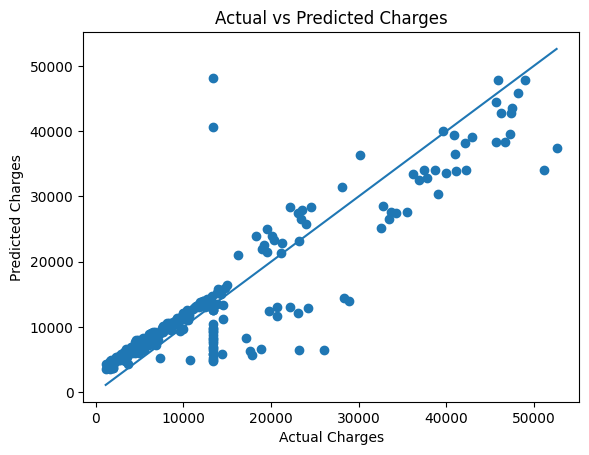

In [262]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

11.2 Residuals (Difference between Actual and Predicted Values)

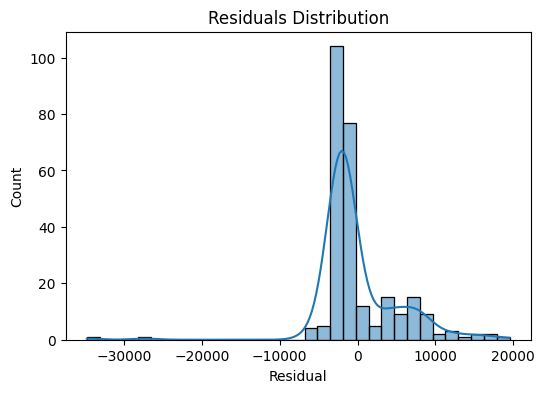

In [263]:
residuals = y_test - y_test_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.show()

12. Predicting a New Sample

In [264]:
sample = pd.DataFrame({
    "age": [19],
    "bmi": [22.7],
    "children": [0],
    "sex": ["male"],
    "smoker": ["no"],
    "region": ["northwest"]
})

sample_encoded = pd.get_dummies(
    sample,
    columns=["sex", "smoker", "region"],
    drop_first=True
)

# Align columns with training data
sample_encoded = sample_encoded.reindex(
    columns=X_train.columns,
    fill_value=0
)

predicted_charge = model.predict(sample_encoded)
print("\nPredicted insurance charge:", predicted_charge[0])


Predicted insurance charge: 7719.044540889539
